In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering

In [2]:
df=pd.read_csv("F:\\Dinesh personal\\ExcelR\\assignments\\Assignment 7\\crime_data.csv", index_col=0)

In [3]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
df.shape

(50, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [6]:
df1=pd.DataFrame(normalize(df),columns=df.columns)

In [7]:
df1.head()

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295


In [8]:
import scipy.cluster.hierarchy as sch

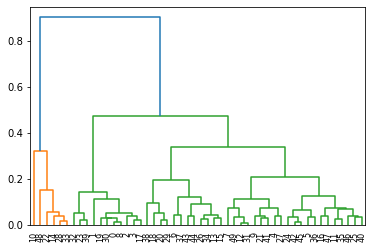

In [9]:
dendrogram=sch.dendrogram(sch.linkage(df1,'complete'))

In [10]:
hclusters=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=3)

In [11]:
hclusters.fit_predict(df1)

array([2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 2], dtype=int64)

In [12]:
y=pd.DataFrame(hclusters.fit_predict(df1),columns=['cluster'])
y['cluster'].value_counts()

0    24
2    20
1     6
Name: cluster, dtype: int64

In [13]:
df1['cluster']=hclusters.labels_

In [15]:
df1.head()

,Murder,Assault,UrbanPop,Rape,cluster
0,0.054031,0.966016,0.237411,0.086778,2
1,0.036872,0.969739,0.176987,0.164081,2
2,0.026439,0.959624,0.261122,0.101185,2
3,0.044528,0.961392,0.252998,0.098669,2
4,0.030657,0.940134,0.309972,0.138295,2


In [17]:
df1.cluster.value_counts()

0    24
2    20
1     6
Name: cluster, dtype: int64

In [19]:
df1.groupby(['cluster']).agg(['mean'])

,Murder,Assault,UrbanPop,Rape
,mean,mean,mean,mean
cluster,,,,
0,0.039800,0.874131,0.459598,0.127377
1,0.029714,0.655773,0.731864,0.143057
2,0.045019,0.958570,0.252999,0.102582


In [20]:
df1.groupby(['cluster']).agg(['mean']).reset_index()

,cluster,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,0.039800,0.874131,0.459598,0.127377
1,1,0.029714,0.655773,0.731864,0.143057
2,2,0.045019,0.958570,0.252999,0.102582
